In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors

from flux import *
from xsec import *

import osc

In [3]:
plt.rcParams.update({'font.size': 14})

In [4]:
# Possible Baselines

# ICECUBE

# Radius of earth
R_earth = 6371.0 # km

# Chicago latitude
lat = 41.88

# Baseline, approx sphere
alpha = ((90 - lat)/2)*np.pi/180
ICECUBE_BASELINE = np.sqrt(2*R_earth**2*(1 - np.cos((90+lat)*np.pi/180)))*1e3 # meters

PONE_BASELINE = 1758*1.60934*1e3
KM3NeT_BASELINE = 4427*1.60934*1e3

ICECUBE_BASELINE/1e6, PONE_BASELINE/1e6, KM3NeT_BASELINE/1e6

(11.634962593570254, 2.82921972, 7.12454818)

In [5]:
VOLUME = 1e3*np.pi*(5e2)**2
DENSITY = 1 # t / m^3

In [6]:
# 500 mega-tonne mass, baseline
MASS = 500e6

# density of water
DENSITY = 1 # t / m^3

VOLUME = MASS / DENSITY
RADIUS = np.power(VOLUME/((4./3.)*np.pi), 1./3.)

# Baseline muon energy
Emuon = 5e3

# Neutrino energies
Enu = np.linspace(0, Emuon, 1000)

# radii
Rs = np.linspace(0, RADIUS, 1000)

# Baseline baseline (Chicago -> IceCube)
# Or Chicago -> KM3NeT
baseline = PONE_BASELINE # m

RADIUS, baseline, RADIUS/baseline, MU_MASS/Emuon

(492.3725109213481, 2829219.72, 0.00017403120282271612, 2.114e-05)

In [7]:
thmax = 3*MU_MASS/Emuon
ths = np.linspace(0, thmax, 1001)
flux = numu_flux_baseline(Emuon, 0, np.tile(Enu, (ths.size, 1)), np.cos(np.tile(ths, (Enu.size, 1)).T), 1)

In [8]:
# check norm -- should be close to 1
dcosth = np.tile(np.abs(np.diff(np.cos(ths))), (Enu.size-1, 1)).T
dE = np.tile(np.abs(np.diff(Enu)), (ths.size-1, 1))

np.sum(flux[:-1, :-1]*dE*dcosth*2*np.pi) / 5e15

0.18045517469584083

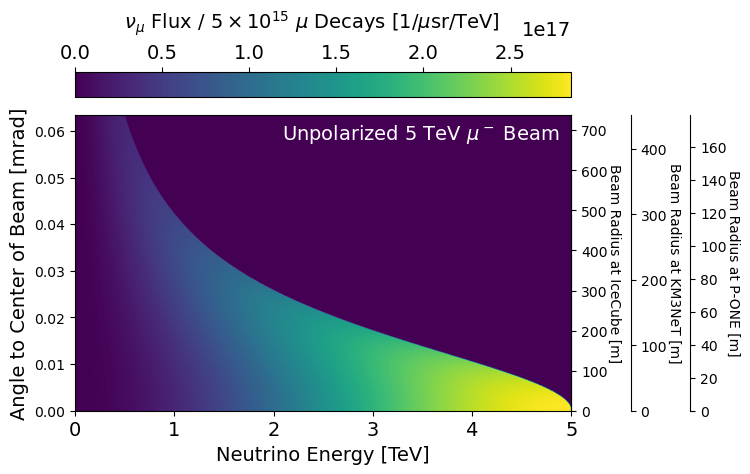

In [13]:
flux = numu_flux_baseline(Emuon, 0, np.tile(Enu, (ths.size, 1)), np.cos(np.tile(ths, (Enu.size, 1)).T), 1)
plt.imshow(flux*1e-6*1e3, extent=[0, Emuon/1e3, 0, thmax*1e3], aspect="auto", origin="lower")

plt.xlabel("Neutrino Energy [TeV]")
plt.ylabel("Angle to Center of Beam [mrad]")

plt.text(0.975, 0.975, "Unpolarized %i TeV $\\mu^-$ Beam" % (Emuon/1e3), 
         horizontalalignment="right", verticalalignment="top", color="white", transform=plt.gca().transAxes)

def mrad_to_radius_ICECUBE(mrad):
    return np.sin(mrad/1e3)*ICECUBE_BASELINE

def radius_to_mrad_ICECUBE(R):
    return np.arcsin(R/ICECUBE_BASELINE)/1e3

secax_y = plt.gca().secondary_yaxis('right', functions=(mrad_to_radius_ICECUBE, radius_to_mrad_ICECUBE))
secax_y.set_ylabel("Beam Radius at IceCube [m]", rotation=270, labelpad=10, fontsize=10)

def mrad_to_radius_KM3NeT(mrad):
    return np.sin(mrad/1e3)*KM3NeT_BASELINE

def radius_to_mrad_KM3NeT(R):
    return np.arcsin(R/KM3NeT_BASELINE)/1e3

thirdax_y = plt.gca().secondary_yaxis(1.12, functions=(mrad_to_radius_KM3NeT, radius_to_mrad_KM3NeT))
thirdax_y.set_ylabel("Beam Radius at KM3NeT [m]", rotation=270, labelpad=10, fontsize=10)

def mrad_to_radius_PONE(mrad):
    return np.sin(mrad/1e3)*PONE_BASELINE

def radius_to_mrad_PONE(R):
    return np.arcsin(R/PONE_BASELINE)/1e3

forthax_y = plt.gca().secondary_yaxis(1.24, functions=(mrad_to_radius_PONE, radius_to_mrad_PONE))
forthax_y.set_ylabel("Beam Radius at P-ONE [m]", rotation=270, labelpad=10, fontsize=10)

plt.gca().tick_params(axis='y', which='major', labelsize=10)
secax_y.tick_params(axis='y', which='major', labelsize=10)
thirdax_y.tick_params(axis='y', which='major', labelsize=10)
forthax_y.tick_params(axis='y', which='major', labelsize=10)

cbar = plt.colorbar(location='top', orientation="horizontal")

cbar.set_label("        $\\nu_\\mu$ Flux / $5\\times10^{15}$ $\\mu$ Decays [1/$\\mu$sr/TeV]", loc="left", labelpad=10)
plt.savefig("figures/numu_flux.pdf",dpi=100,bbox_inches='tight')

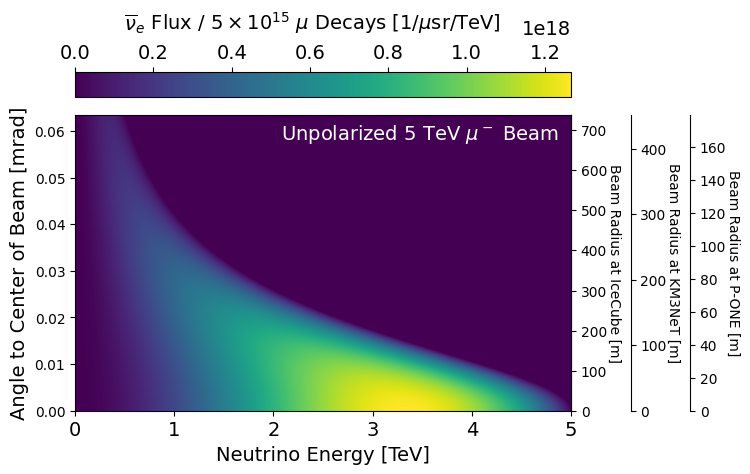

In [197]:
flux = nue_flux_baseline(Emuon, 0, np.tile(Enu, (ths.size, 1)), np.cos(np.tile(ths, (Enu.size, 1)).T), 1)

plt.imshow(flux*1e-6*1e3, extent=[0, Emuon/1e3, 0, thmax*1e3], aspect="auto", origin="lower")

plt.xlabel("Neutrino Energy [TeV]")
plt.ylabel("Angle to Center of Beam [mrad]")

plt.text(0.975, 0.975, "Unpolarized %i TeV $\\mu^-$ Beam" % (Emuon/1e3), 
         horizontalalignment="right", verticalalignment="top", color="white", transform=plt.gca().transAxes)

def mrad_to_radius_ICECUBE(mrad):
    return np.sin(mrad/1e3)*ICECUBE_BASELINE

def radius_to_mrad_ICECUBE(R):
    return np.arcsin(R/ICECUBE_BASELINE)/1e3

secax_y = plt.gca().secondary_yaxis('right', functions=(mrad_to_radius_ICECUBE, radius_to_mrad_ICECUBE))
secax_y.set_ylabel("Beam Radius at IceCube [m]", rotation=270, labelpad=10, fontsize=10)

def mrad_to_radius_KM3NeT(mrad):
    return np.sin(mrad/1e3)*KM3NeT_BASELINE

def radius_to_mrad_KM3NeT(R):
    return np.arcsin(R/KM3NeT_BASELINE)/1e3

thirdax_y = plt.gca().secondary_yaxis(1.12, functions=(mrad_to_radius_KM3NeT, radius_to_mrad_KM3NeT))
thirdax_y.set_ylabel("Beam Radius at KM3NeT [m]", rotation=270, labelpad=10, fontsize=10)

def mrad_to_radius_PONE(mrad):
    return np.sin(mrad/1e3)*PONE_BASELINE

def radius_to_mrad_PONE(R):
    return np.arcsin(R/PONE_BASELINE)/1e3

forthax_y = plt.gca().secondary_yaxis(1.24, functions=(mrad_to_radius_PONE, radius_to_mrad_PONE))
forthax_y.set_ylabel("Beam Radius at P-ONE [m]", rotation=270, labelpad=10, fontsize=10)

plt.gca().tick_params(axis='y', which='major', labelsize=10)
secax_y.tick_params(axis='y', which='major', labelsize=10)
thirdax_y.tick_params(axis='y', which='major', labelsize=10)
forthax_y.tick_params(axis='y', which='major', labelsize=10)

cbar = plt.colorbar(location='top', orientation="horizontal")

cbar.set_label("        $\\overline{\\nu}_e$ Flux / $5\\times10^{15}$ $\\mu$ Decays [1/$\\mu$sr/TeV]", loc="left", labelpad=10)

In [17]:
# Rate of neutrino interactions / dR / dE
# Units: (Number of Interactions) / m / GeV
def rate(flux, xsec, Enu, R, P):
    costh = np.cos(R/baseline)
    ret = flux(Emuon, P, Enu, costh, baseline)*xsec(Enu)*MASS*(4*np.pi*R*np.sqrt(RADIUS**2 - R**2)/VOLUME)
    if not isinstance(ret, float):
        ret[R > RADIUS] = 0
    elif R > RADIUS:
        return 0
    return ret
    
def numu_rate(Enu, R, P):
    return rate(numu_flux_baseline, xsec, Enu, R, P)

def nue_rate(Enu, R, P):
    return nue_rate(numu_flux_baseline, xsec, Enu, R, P)

def numubar_rate(Enu, R, P):
    return rate(numu_flux_baseline, xsecbar, Enu, R, P)

def nuebar_rate(Enu, R, P):
    return rate(nue_flux_baseline, xsecbar, Enu, R, P)

Text(0.975, 0.975, 'Baseline: 2829 km\nFid. Mass: 500 Mt')

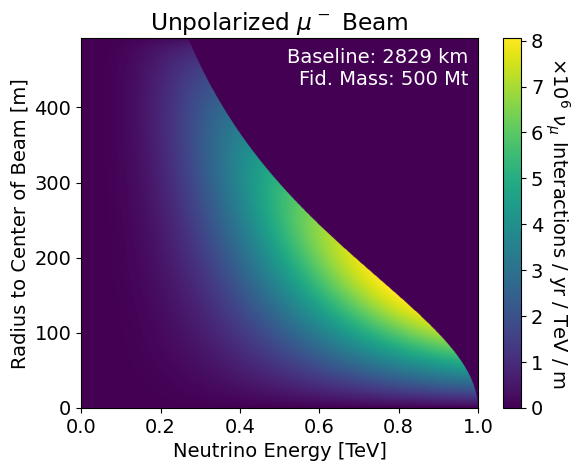

In [18]:
plt.imshow(numu_rate(np.tile(Enu, (Rs.size, 1)), np.tile(Rs, (Enu.size, 1)).T, 0)*1e3/1e6,
          extent=[0, Emuon/1e3, 0, RADIUS], aspect="auto", origin="lower")

cbar = plt.colorbar()
cbar.set_label("$\\times10^6 \\,\\,\\nu_\\mu$ Interactions / yr / TeV / m", rotation=-90, labelpad=20)
plt.title("Unpolarized $\\mu^-$ Beam")

plt.xlabel("Neutrino Energy [TeV]")
plt.ylabel("Radius to Center of Beam [m]")
plt.text(0.975, 0.975, "Baseline: %.0f km\nFid. Mass: %.0f Mt" % (baseline/1e3, MASS/1e6), 
         horizontalalignment="right", verticalalignment="top", color="white", transform=plt.gca().transAxes)

Text(0.975, 0.975, 'Baseline: 2829 km\nFid. Mass: 500 Mt')

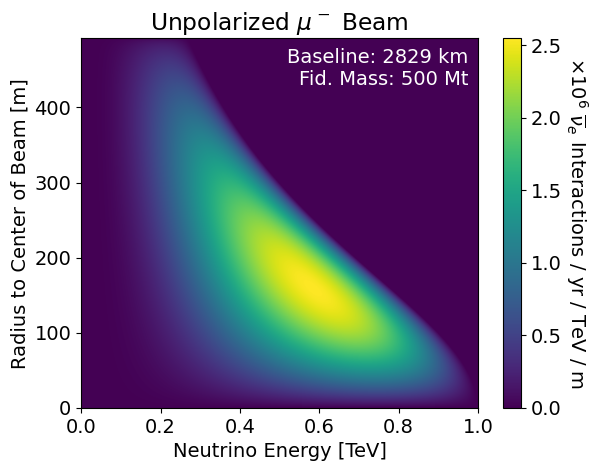

In [19]:
plt.imshow(nuebar_rate(np.tile(Enu, (Rs.size, 1)), np.tile(Rs, (Enu.size, 1)).T, 0)*1e3/1e6,
          extent=[0, Emuon/1e3, 0, RADIUS], aspect="auto", origin="lower")

cbar = plt.colorbar()
cbar.set_label("$\\times10^6 \\,\\,\\overline{\\nu}_e$ Interactions / yr / TeV / m", rotation=-90, labelpad=20)
plt.title("Unpolarized $\\mu^-$ Beam")

plt.xlabel("Neutrino Energy [TeV]")
plt.ylabel("Radius to Center of Beam [m]")
plt.text(0.975, 0.975, "Baseline: %.0f km\nFid. Mass: %.0f Mt" % (baseline/1e3, MASS/1e6), 
         horizontalalignment="right", verticalalignment="top", color="white", transform=plt.gca().transAxes)